<a href="https://colab.research.google.com/github/mwelland/ENGPYHS_3NM4/blob/main/Assignments/Assignment_4_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 4

Due EOD Monday Oct 7



#Question 1:

- What's the importance of w? (irrelevant, only lambda is useful)
- Are we able to solve for w or T? (no, all we can find is the ratio!)
- What is a good initial guess for s? (L is a good one since the length will probably be close to the span, but you could get a better one using L and h  (twice the hypotenuse)
- What's a good initial guess for lambda? (anything really, except zero)
- Is 0 a good initial guess for lambda? Why or why not? (not a good guess since hte equation has 1/lambda, so this with NaN out! Also not realistice to have a zero-weight cord!)
- What method did you use to solve it? Why? (Newton's method would normally be the way to go,  but calculating the Jacobian of this mess would be cumbersom. Secant doesn't require Jacobian information so it is easier. Bracketting is also fine but they would have to find a suitable bracket and it would be slow. Whatever solver they use is fine.)

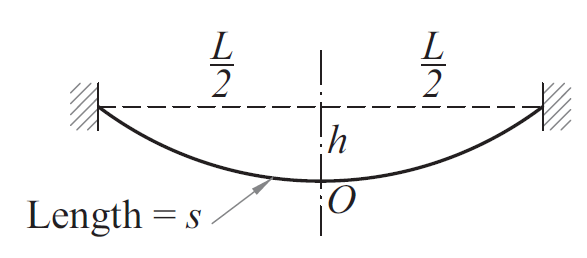

A cable is suspended as shown. Its length $s$ and sag $h$ are related to the span $L$ by

$$s = \frac{2}{\lambda} sinh \frac{\lambda L}{2}$$

$$h = \frac{1}{\lambda} \left[cosh \frac{\lambda L}{2}-1\right]$$

where $\lambda = \frac{w}{T}$, $w$ is the weight of the cable per unit length, and $T$ is the cable tension at O.

Given that $L=160\  m$ and $h=15 \ m$:



##a)
What is your vector of unknowns $\vec{x}$?

{answer}

Answer:

$$
\vec{x}=
\begin{bmatrix}
s\\
\lambda
\end{bmatrix}
$$

##b) Write out the function $\vec{f}(\vec{x})$ such that the roots solves this system.

{answer}

Answer:

$$
\vec{f}(\vec{x})=
\begin{bmatrix}
&\frac{2}{\lambda} sinh \frac{\lambda L}{2}-s \\
&\frac{1}{\lambda} \left[cosh \frac{\lambda L}{2}-1\right]-h \\
\end{bmatrix}
$$

## c) Solve for $s$

{method, answer}

In [ ]:
import numpy as np
from scipy.optimize import newton

L = 160
h = 15

def f(x):
  s, lamda = x
  f1 = (2 / lamda) * np.sinh((lamda * L) / 2) - s
  f2 = (1 / lamda) * (np.cosh((lamda * L) / 2) - 1) - h
  return [f1, f2]

initial_guess = [160, .1]  # Initial guess for s and lambda
solution = newton(f, initial_guess)

s, lamda = solution

print("s =", s, " using the Secant method")
print("lambda =", lamda)


s = 163.69044030095793  using the Secant method
lambda = 0.004634177945497283


## d) What algorithm did you use for c)?

{answer}

*Be prepared to discuss how it works!*

# Question 2

You have two circles:

$$ \begin{align}
[x -2]^2 + y^2 &= 4 \\
x^2 + [y-3]^2 &= 4
\end{align} $$

and you want to find where they cross.

HINT: Think about this!

- How many points of intersection are they with two circles? (2)
- How did they determine the intial guess? (I would graph it and look. They might be inclined to use the centrepoints but this wouldn't be good since the solutions are equidistant from there (by definition!))
- If you changed the radius, what variable would change in your problem? (f(x) would change)
- Is it possible for this system to have *no* solutions? (yes! Just move the circles far apart!)
- Once you have the vector f and jacobian matrix J, how do you solve for the update given J dx = -f? (Use a linear solver!)
- Which linear solver should you use? (Use LU! Always the #1 guess!)

a) Write out $\vec{f}({\vec{x}})$

{answer}

answer:

$$
\vec{f}(\vec{x})=
\begin{bmatrix}
[x -2]^2 + y^2 -4 \\
x^2 + [y-3]^2 - 4
\end{bmatrix}
$$

b) Write out the Jacobian $J(\vec{x})$

{answer}

Answer:

$$
J=
\begin{bmatrix}
2[x -2] &  2y \\
2 x & 2[y-3]  
\end{bmatrix}
$$

c) Write a Newton-Raphson method and use it to find where the circles cross (*Don't use a nonlinear solver - show the algorithm!*)

{implementation, answer x2}

Answer:
First, plot the circles to see that there are two points of intersection.

<ipython-input-1-50acf17bd0e3>:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(4 - (x - 2)**2)
<ipython-input-1-50acf17bd0e3>:9: RuntimeWarning: invalid value encountered in sqrt
  return 3 - np.sqrt(4 - x**2)


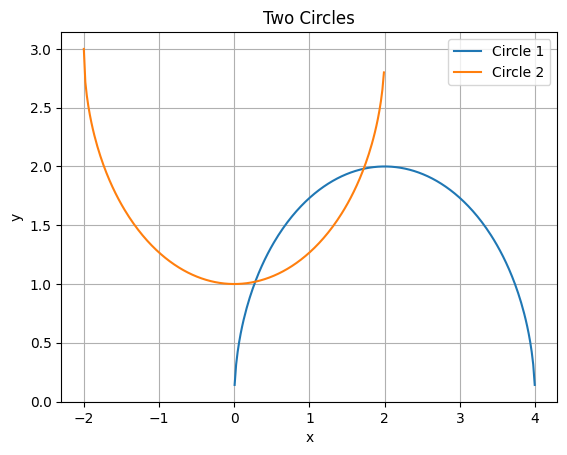

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the equations of the circles
def circle1(x):
  return np.sqrt(4 - (x - 2)**2)

def circle2(x):
  return 3 - np.sqrt(4 - x**2)


# Generate x values for plotting
x = np.linspace(-2, 6, 400)

# Calculate corresponding y values for each circle
y1 = circle1(x)
y2 = circle2(x)


# Plot the circles
plt.plot(x, y1, label='Circle 1')
plt.plot(x, y2, label='Circle 2')


# Set plot title and labels
plt.title('Two Circles')
plt.xlabel('x')
plt.ylabel('y')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Implement Newton's method:

In [ ]:
import numpy as np

def f(x):
  x, y = x
  f1 = (x - 2)**2 + y**2 - 4
  f2 = x**2 + (y - 3)**2 - 4
  return [f1, f2]

def jacobian_f(x):
  x, y = x
  df1_dx = 2 * (x - 2)
  df1_dy = 2 * y
  df2_dx = 2 * x
  df2_dy = 2 * (y - 3)
  return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])

def newton_raphson(f, jacobian_f, initial_guess, tolerance=1e-6, max_iterations=100):

  x = np.array(initial_guess)
  for i in range(max_iterations):
    f_x = np.array(f(x))
    jacobian_x = jacobian_f(x)
    delta_x = np.linalg.solve(jacobian_x, -f_x)
    x = x + delta_x

    if np.linalg.norm(f_x) < tolerance:
      return x

  print("Newton-Raphson method did not converge within the maximum number of iterations.")
  return x

initial_guess = [0, 0]
solution = newton_raphson(f, jacobian_f, initial_guess)
print("Solution 1:", solution)

initial_guess = [2, 2]
solution = newton_raphson(f, jacobian_f, initial_guess)
print("Solution 2:", solution)

Solution 1: [0.27942331 1.01961554]
Solution 2: [1.72057669 1.98038446]
